In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
columns=['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [3]:
cars = pd.read_csv('car.data', names=columns)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.shape

(205, 26)

In [7]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:

cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

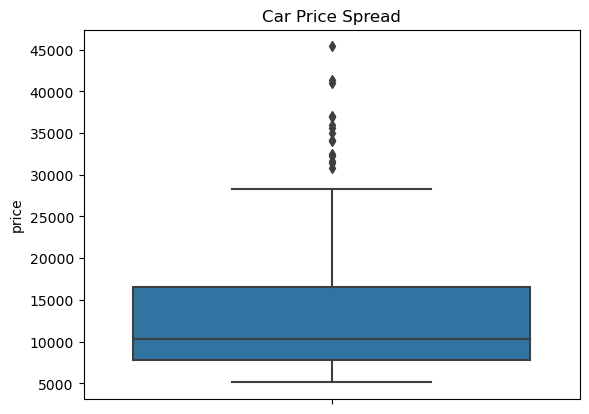

In [10]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

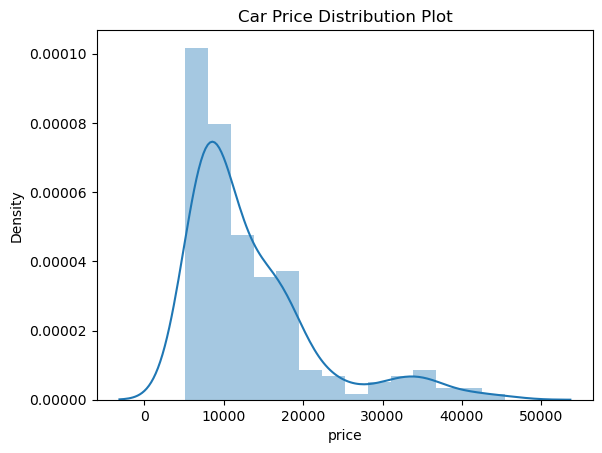

In [11]:
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

In [12]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [13]:
#ignoring line 14


[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

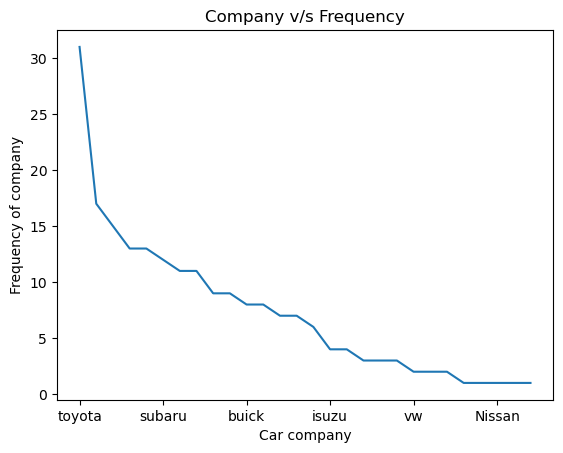

In [14]:
plt1 = cars.CompanyName.value_counts().plot()

plt.title('Company v/s Frequency')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


Text(0.5, 1.0, 'Companies Histogram')

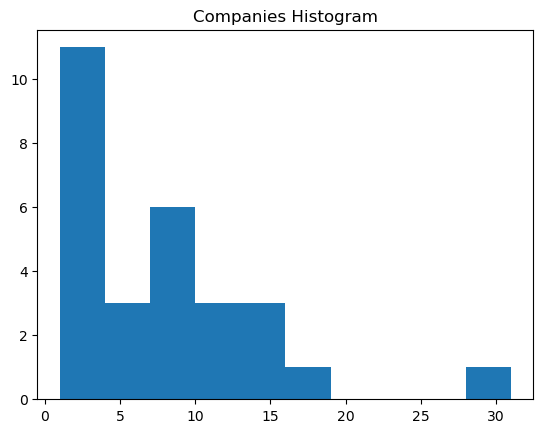

In [15]:
plt2 = plt.hist(cars.CompanyName.value_counts())
plt.title('Companies Histogram')

[Text(0.5, 24.0, 'Car Type'),
 Text(24.000000000000014, 0.5, 'Frequency of Car type')]

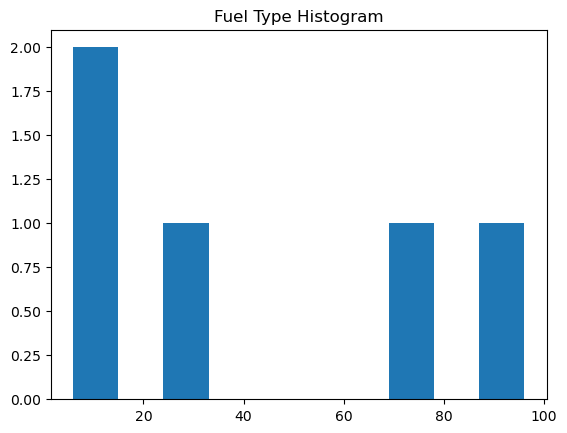

In [16]:
plt3= plt.hist(cars.carbody.value_counts())
plt.title('Fuel Type Histogram')

plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')


In [17]:
print(cars.price)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


Text(0.5, 0, 'carwidth')

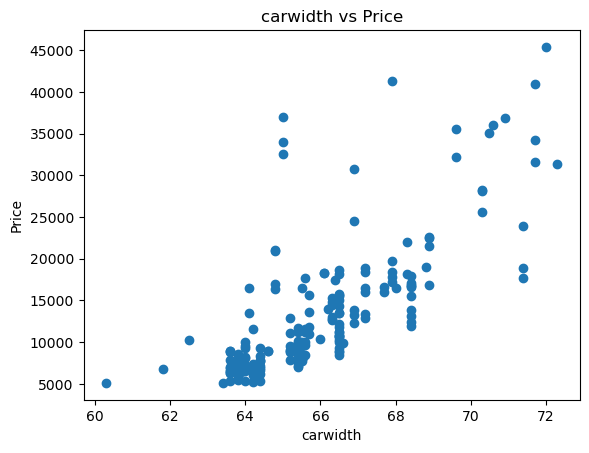

In [18]:
    plt.scatter(cars['carwidth'],cars['price'])
    plt.title('carwidth'+' vs Price')
    plt.ylabel('Price')
    plt.xlabel('carwidth')

Text(0.5, 0, 'carlength')

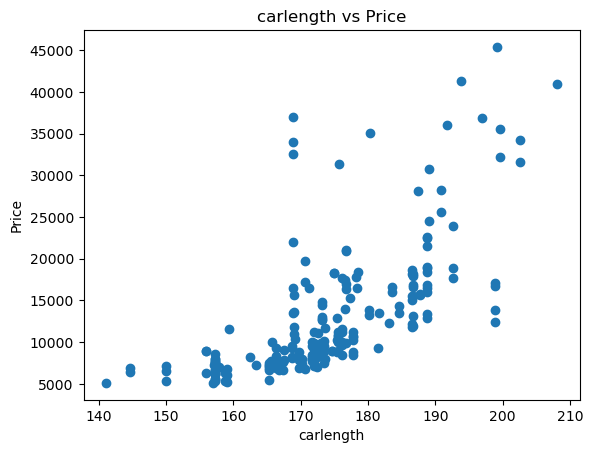

In [19]:
    #using scatter for visualising data 
    
    plt.scatter(cars['carlength'],cars['price'])
    plt.title('carlength'+' vs Price')
    plt.ylabel('Price')
    plt.xlabel('carlength')

Text(0.5, 0, 'curbweight')

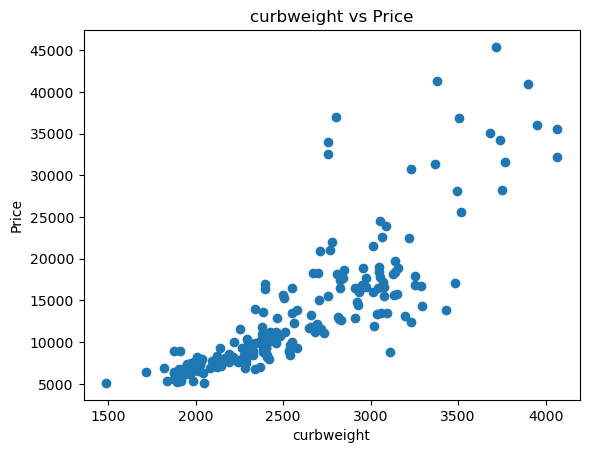

In [20]:
    plt.scatter(cars['curbweight'],cars['price'])
    plt.title('curbweight'+' vs Price')
    plt.ylabel('Price')
    plt.xlabel('curbweight')


Text(0.5, 0, 'carheight')

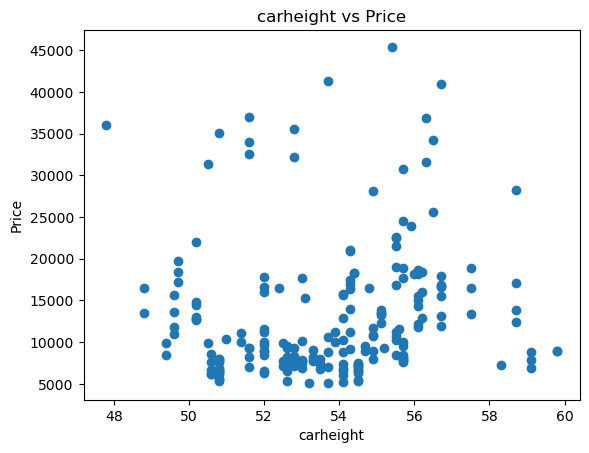

In [21]:
    plt.scatter(cars['carheight'],cars['price'])
    plt.title('carheight'+' vs Price')
    plt.ylabel('Price')
    plt.xlabel('carheight')

In [22]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.8411182684818455

In [23]:
cars['fueleco'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [24]:
cars['price'] = cars['price'].astype('int')

In [25]:
carstemp = cars.copy()

In [26]:
t1 = carstemp.groupby(['CompanyName'])['price'].mean()

In [27]:
carstemp  = carstemp.merge(t1.reset_index(), how='left',on='CompanyName')

In [28]:
binvariable = [0,10000,20000,40000]

In [29]:
carsbin=['In Budget','Medium','Highend']

In [30]:
cars['carsrange'] = pd.cut(carstemp['price_y'],binvariable,right=False,labels=carsbin)

In [31]:
cars.head(20)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleco,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250,21.70,Medium
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710,21.70,Medium
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,18920,21.70,Medium
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875,18.35,Medium
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.0,160,5500,16,22,17859,18.70,Medium


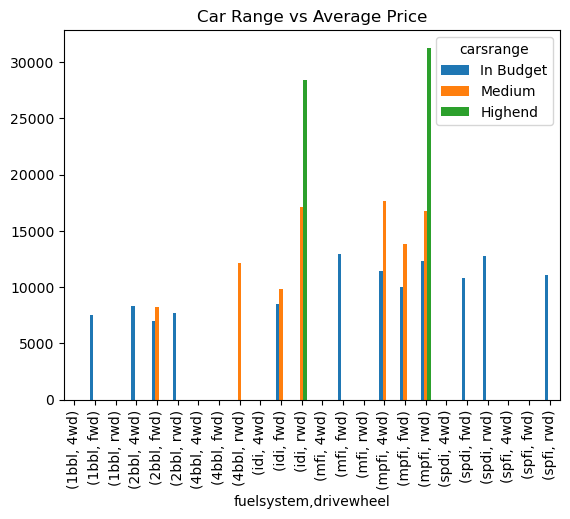

In [32]:
df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

In [33]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleco', 'carlength','carwidth', 'carsrange']]

In [34]:
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleco,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [35]:
# Defining the map function
def duplicates(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [36]:
cars_lr = duplicates('fueltype',cars_lr)
cars_lr = duplicates('aspiration',cars_lr)
cars_lr = duplicates('carbody',cars_lr)
cars_lr = duplicates('drivewheel',cars_lr)
cars_lr = duplicates('enginetype',cars_lr)
cars_lr = duplicates('cylindernumber',cars_lr)
cars_lr = duplicates('carsrange',cars_lr)

In [37]:
cars_lr.shape

(205, 31)

In [38]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleco','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleco,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [41]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleco,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.398601,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.491331,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

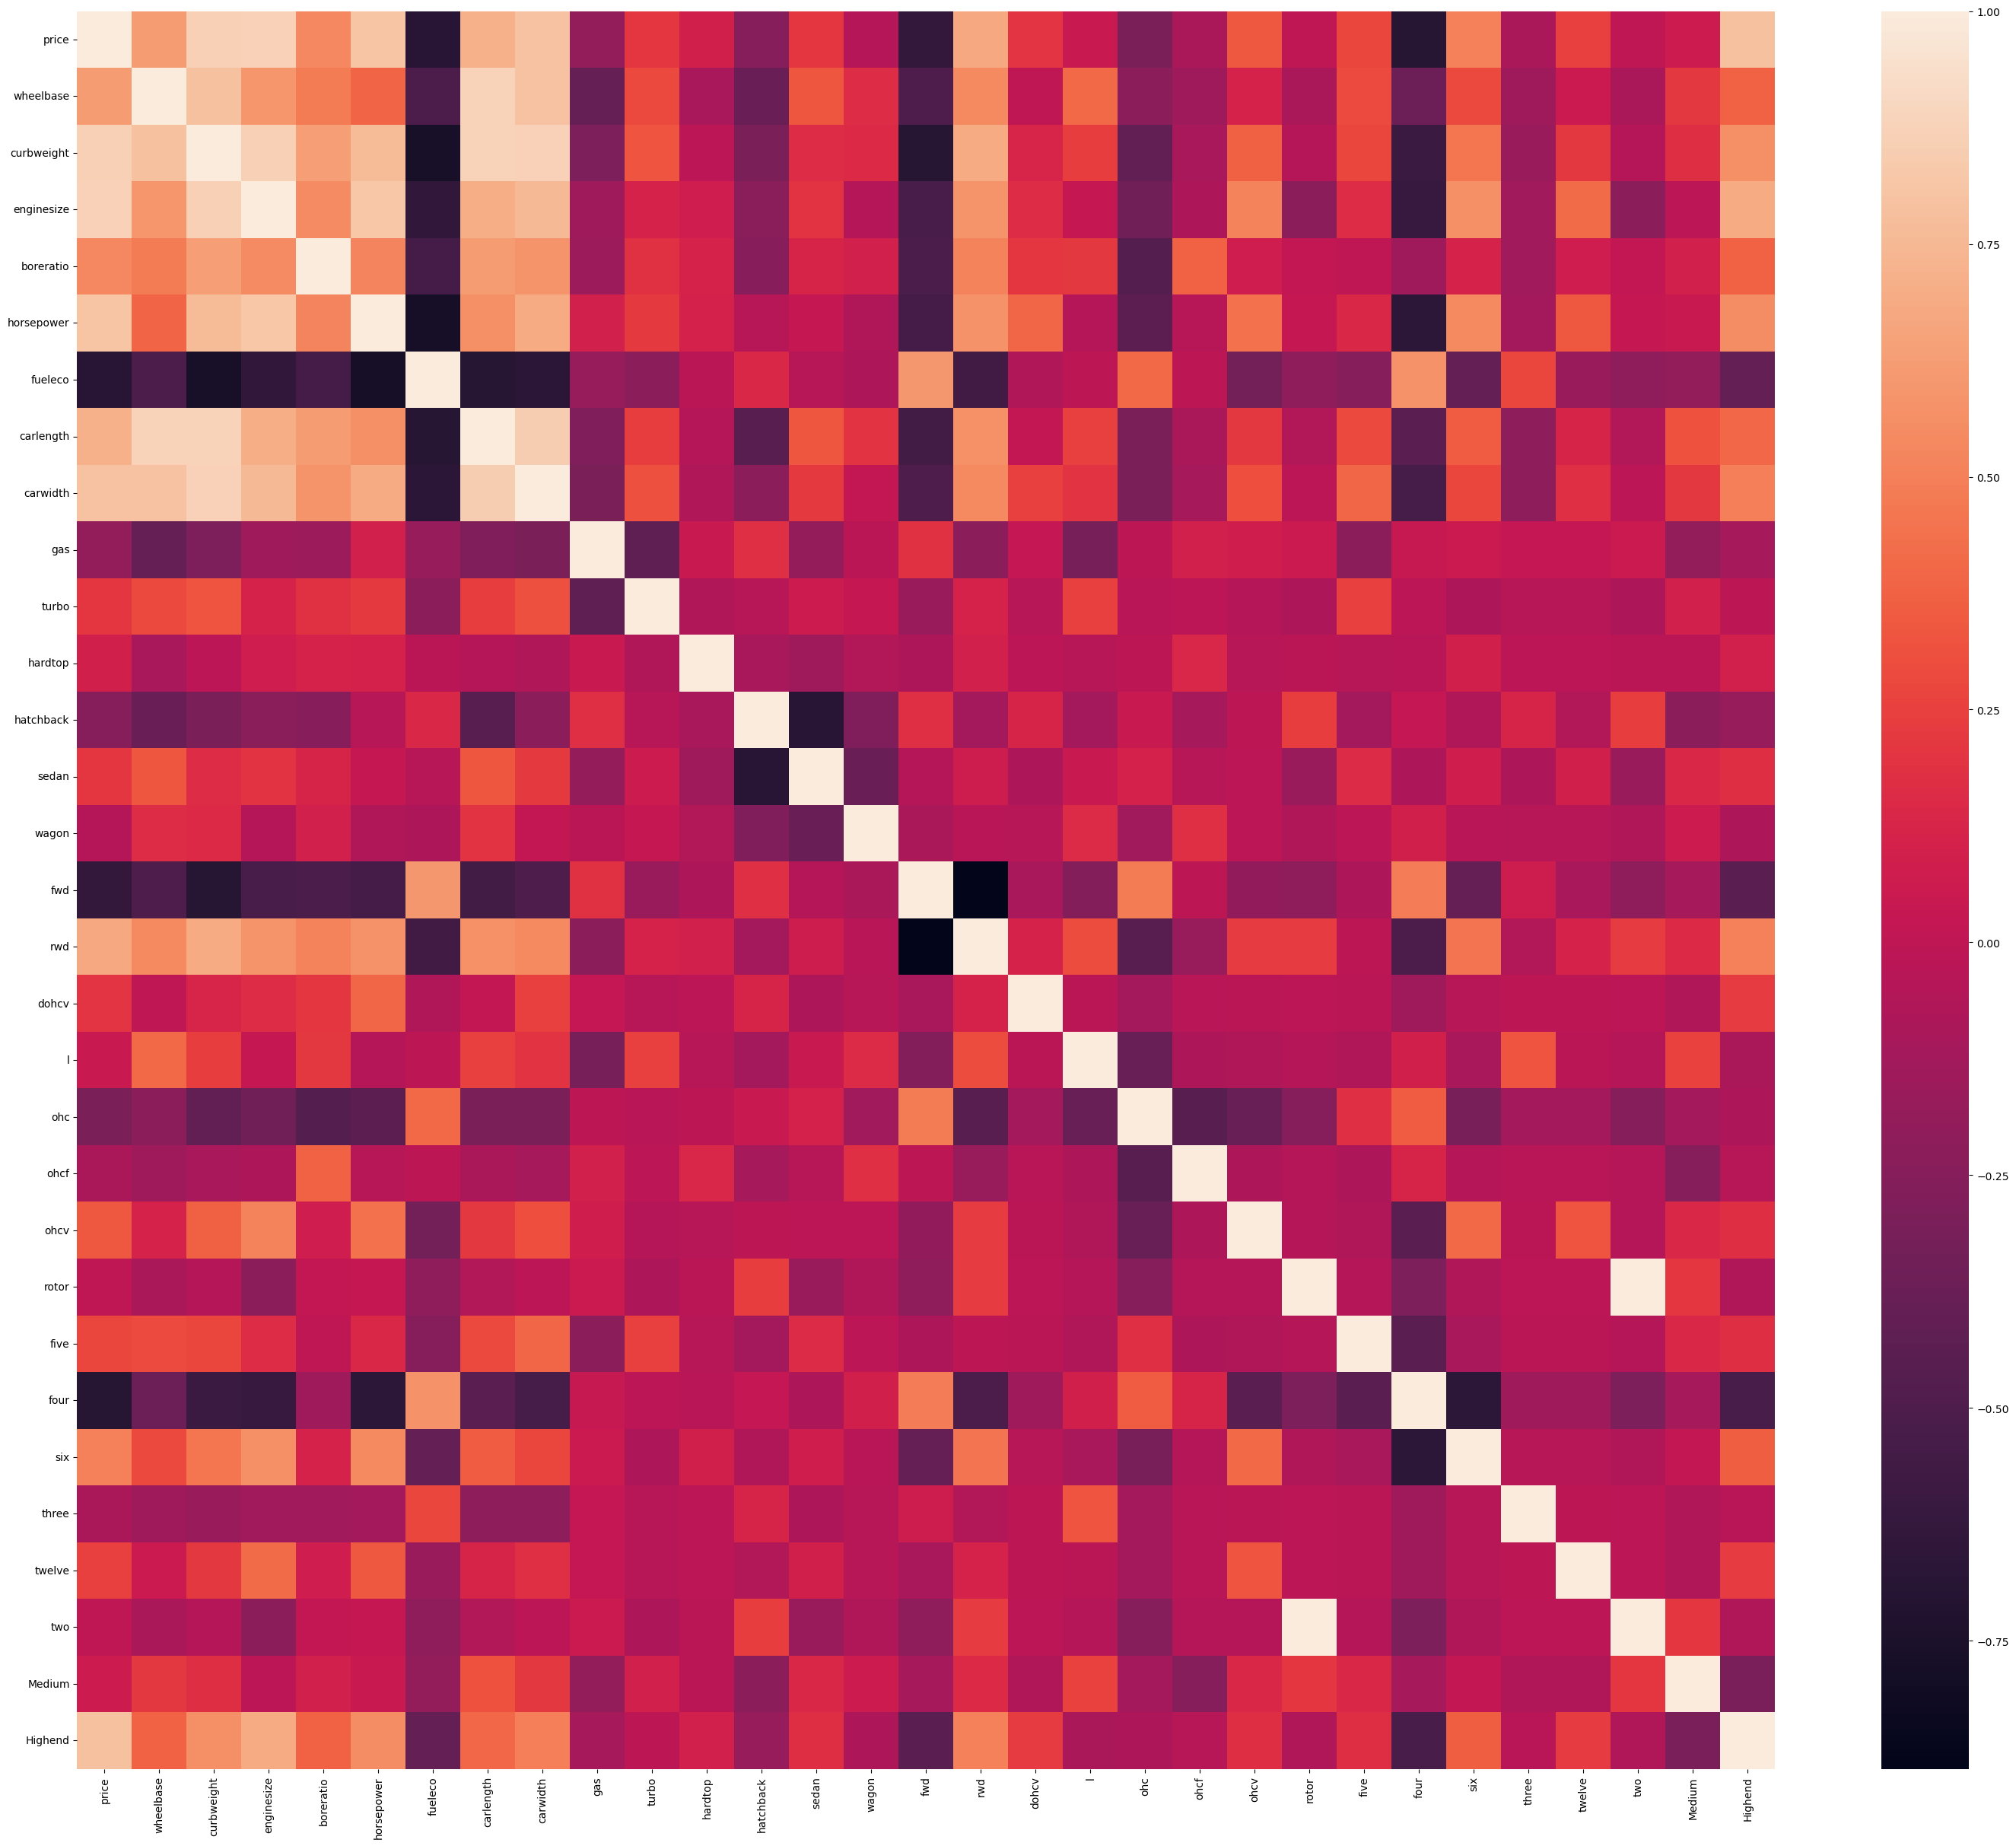

In [42]:
plt.figure(figsize = (36, 30))
sns.heatmap(df_train.corr(), annot =False)


In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
print(y_train)
print(X_train)

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64
     wheelbase  curbweight  enginesize  boreratio  horsepower   fueleco  \
122   0.244828    0.272692    0.139623   0.230159    0.083333  0.530864   
125   0.272414    0.500388    0.339623   1.000000    0.395833  0.213992   
166   0.272414    0.314973    0.139623   0.444444    0.266667  0.344307   
1     0.068966    0.411171    0.260377   0.626984    0.262500  0.244170   
199   0.610345    0.647401    0.260377   0.746032    0.475000  0.122085   
..         ...         ...         ...        ...         ...       ...   
87    0.334483    0.354926    0.184906   0.388889    0.283333  0.311385   
103   0.475862    0.609775    0.452830   0.595238    0.433333  0.189300   
67    0.806897    0.786268    0.460377   0.714286    0.312500  0.234568   
24    0.244828    0.185803    0.1

In [45]:
#Model bild
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleco', 'carwidth',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

In [48]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,horsepower,fueleco,carwidth,hardtop,hatchback,sedan,wagon,dohcv,five,four,six,twelve,Highend
122,0.244828,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0,1,0,0,0


In [49]:
#Model 1
X_train_rfe = sm.add_constant(X_train_rfe) 
lm = sm.OLS(y_train,X_train_rfe).fit() 
X_train_new=X_train_rfe

In [50]:
print('MODEL 1 SUMMARY')
print(lm.summary())

MODEL 1 SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.16e-68
Time:                        14:35:49   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.050    

In [51]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)


In [52]:
X_train_new = X_train_new.drop(["fueleco"], axis = 1)

In [53]:
X_train_rfe = sm.add_constant(X_train_rfe) 
lm = sm.OLS(y_train,X_train_rfe).fit() 
X_train_new=X_train_rfe

In [54]:
print('MODEL 2 SUMMARY')
print(lm.summary())

MODEL 2 SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.16e-68
Time:                        14:35:49   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.050    

In [55]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.shape

(16, 2)

In [56]:
vif.head(16)

,Features,VIF
0,const,108.84
8,sedan,13.72
2,curbweight,12.62
7,hatchback,11.67
3,horsepower,11.16
5,carwidth,7.92
1,wheelbase,7.11
9,wagon,6.59
12,four,5.04
13,six,4.59


In [57]:
X_train_new = X_train_new.drop(["sedan"], axis = 1) #high VIF

In [58]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1) #high VIf value

In [59]:
    X_train_new = sm.add_constant(X_train_new) #Adding the constant
    lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
    X_train_new =  X_train_new

In [60]:
print('MODEL 3 SUMMARY')
print(lm.summary())

MODEL 3 SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.55e-65
Time:                        14:35:49   Log-Likelihood:                 201.33
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                     129   BIC:                            -333.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0576      0.046    

In [61]:
    X_train_new = sm.add_constant(X_train_new) #Adding the constant
    lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
    X_train_new =  X_train_new

In [62]:
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.shape

(14, 2)

In [63]:
vif.head(14)

,Features,VIF
0,const,79.06
2,horsepower,9.23
4,carwidth,6.99
10,four,5.02
11,six,4.51
1,wheelbase,4.43
3,fueleco,4.13
9,five,2.37
8,dohcv,2.06
13,Highend,1.73


In [64]:
print('MODEL 4 SUMMARY')
print(lm.summary())

MODEL 4 SUMMARY
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.55e-65
Time:                        14:35:50   Log-Likelihood:                 201.33
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                     129   BIC:                            -333.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0576      0.046    

In [65]:
#Residual Analysis
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

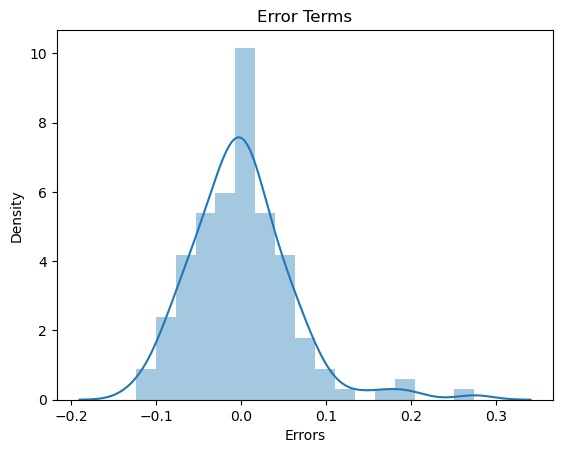

In [66]:
sns.distplot((y_train - y_train_price))
plt.title('Error Terms') 
plt.xlabel('Errors')   

In [67]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleco','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [68]:
print(df_test)
y_test=df_test.pop('price')
print(y_test)

        price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
160  0.058474   0.265306    0.132148    0.082969   0.515873    0.116129   
186  0.077398   0.311953    0.219125    0.131004   0.515873    0.212903   
59   0.086148   0.355685    0.271985    0.187773   0.674603    0.206452   
165  0.097473   0.230321    0.214320    0.082969   0.555556    0.387097   
140  0.055099   0.195335    0.202307    0.126638   0.857143    0.135484   
..        ...        ...         ...         ...        ...         ...   
28   0.088048   0.486880    0.344065    0.187773   0.634921    0.232258   
29   0.189120   0.271137    0.476694    0.336245   0.841270    0.600000   
182  0.059399   0.311953    0.212398    0.078603   0.373016    0.000000   
40   0.122397   0.288630    0.265738    0.135371   0.484127    0.219355   
128  0.790705   0.084548    0.471408    0.502183   0.952381    1.000000   

      fueleco  carlength  carwidth  gas  ...  ohcv  rotor  five  four  six  \
160  1.000000   0.341

In [69]:
X_test = df_test
print(X_test)

     wheelbase  curbweight  enginesize  boreratio  horsepower   fueleco  \
160   0.265306    0.132148    0.082969   0.515873    0.116129  1.000000   
186   0.311953    0.219125    0.131004   0.515873    0.212903  0.561694   
59    0.355685    0.271985    0.187773   0.674603    0.206452  0.508287   
165   0.230321    0.214320    0.082969   0.555556    0.387097  0.458564   
140   0.195335    0.202307    0.126638   0.857143    0.135484  0.491713   
..         ...         ...         ...        ...         ...       ...   
28    0.486880    0.344065    0.187773   0.634921    0.232258  0.434622   
29    0.271137    0.476694    0.336245   0.841270    0.600000  0.233886   
182   0.311953    0.212398    0.078603   0.373016    0.000000  0.963168   
40    0.288630    0.265738    0.135371   0.484127    0.219355  0.545120   
128   0.084548    0.471408    0.502183   0.952381    1.000000  0.209945   

     carlength  carwidth  gas  turbo  ...  ohcv  rotor  five  four  six  \
160   0.341732  0.200000

In [70]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [71]:
y_pred = lm.predict(X_test_new)

In [72]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7557981585955563

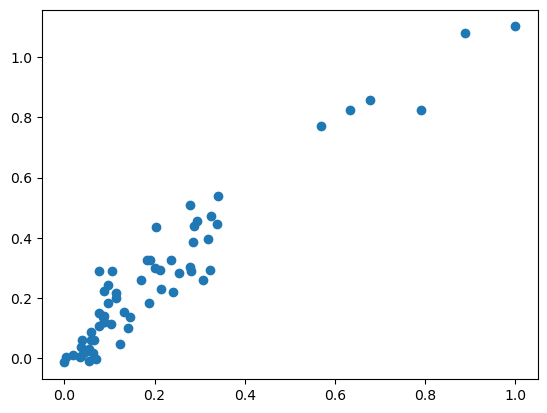

In [73]:
plt.scatter(y_test,y_pred)

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.55e-65
Time:                        14:35:51   Log-Likelihood:                 201.33
No. Observations:                 143   AIC:                            -374.7
Df Residuals:                     129   BIC:                            -333.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0576      0.046     -1.244      0.2